In [1]:
# ██████╗  █████╗ ██████╗  ██████╗██╗ █████╗ ██╗         ██████╗ 
# ██╔══██╗██╔══██╗██╔══██╗██╔════╝██║██╔══██╗██║         ╚════██╗
# ██████╔╝███████║██████╔╝██║     ██║███████║██║          █████╔╝
# ██╔═══╝ ██╔══██║██╔══██╗██║     ██║██╔══██║██║          ╚═══██╗
# ██║     ██║  ██║██║  ██║╚██████╗██║██║  ██║███████╗    ██████╔╝
# ╚═╝     ╚═╝  ╚═╝╚═╝  ╚═╝ ╚═════╝╚═╝╚═╝  ╚═╝╚══════╝    ╚═════╝                                                                

In [65]:
%matplotlib notebook
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d

1. Considerando nuestra ecuación de onda, queremos buscar que alpha debe ser menor que uno, 
$$\frac{\partial^2u}{\partial t^2} = \alpha^2\frac{\partial^2u}{\partial x^2} $$

Donde podemos representar la siguiente ecuación en su manera discretizada:
$$\frac{u_i^{l+1}-2u_i^l+u_i^{l-1}}{ \Delta t^2} = v^2\frac{u_{i+1}^l-2u_i^l+u_{i-1}^l}{\Delta x^2}$$
Ahora despejamos $u_i^{l+1}$ y sea $\alpha = \frac{v \Delta t }{\Delta x}$:

$$u_i^{l+1} = \alpha^2(u_{i+1}^l-2u_i^l+u_{i-1}^l)+2u_i^l-u_i^{l-1}$$

Consideremos las componentes de Fourier, para la discretización, lo cual obtenemos lo siguiente: 
$$u_i^{l+1}-2u_i^l+u_i^{l-1}= -4 \sin^2(\frac{k\Delta x}{2})u_i^l$$

Ahora tenemos, 

$$u_i^{l+1} = -4\alpha^2\sin^2(\frac{k\Delta x}{2})u_i^l+2u_i^l-u_i^{l-1}$$
$$u_i^{l+1} = (2-4\alpha^2\sin^2(\frac{k\Delta x}{2}))u_i^l-u_i^{l-1}$$


Ahora consideremos las condiciones de estabilidad:

$$-2+4\alpha^2\sin^2(\frac{k\Delta x}{2})<2$$
$$\alpha^2\sin^2(\frac{k\Delta x}{2})<1$$

Considerando que el $\sin^2(\beta)$ nos da un valor máximo de 1, entonces tenemos que 

$$\alpha^2<1  \rightarrow |\alpha|<1$$

En el cual, comprobamos que el sistema para que tenga estabilidad es para valores de $\alpha$ menor a la magnitud de 1. 

*Componente de fourier 
$$u_{l,i\pm1} = e^{\pm jk\Delta x}u[l,i]$$



2. Burgers

a)

In [165]:
N = 60
Nt = 500

x = np.linspace(-5.,5.,N)
y = np.linspace(-5.,5.,N)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]
dy = dx

v = 0.3



In [166]:
def h(x,y):
    return 5*np.exp(-(x**2 + y**2))
def InitT():
    T = np.zeros((Nt,N,N))
    
    for i in range(N):
        for j in range(N):
            T[0,i,j] = h(x[i],y[j])
    
    return u

In [167]:
u = InitT()

In [177]:
def GetSolution():
    
    for l in tqdm(range(1,Nt)):
        
        for i in range(1,N-1):
            
            for j in range(1,N-1):
                primero = -u[l-1,i,j]/(2*dx)*(u[l-1,i+1,j]-u[l-1,i-1,j])
                segundo = -u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/(2*dy)
                tercero = v/(dx**2)*(u[l-1,i+1,j]-2*u[l-1,i,j]+u[l-1,i-1,j])
                cuarto = v/(dy**2)*(u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])
                u[l,i,j] =  dt*(primero +  segundo + tercero + cuarto)+u[l-1,i,j]


In [178]:
GetSolution()

100%|█████████████████████████████████████████| 499/499 [00:08<00:00, 57.46it/s]


<IPython.core.display.Javascript object>


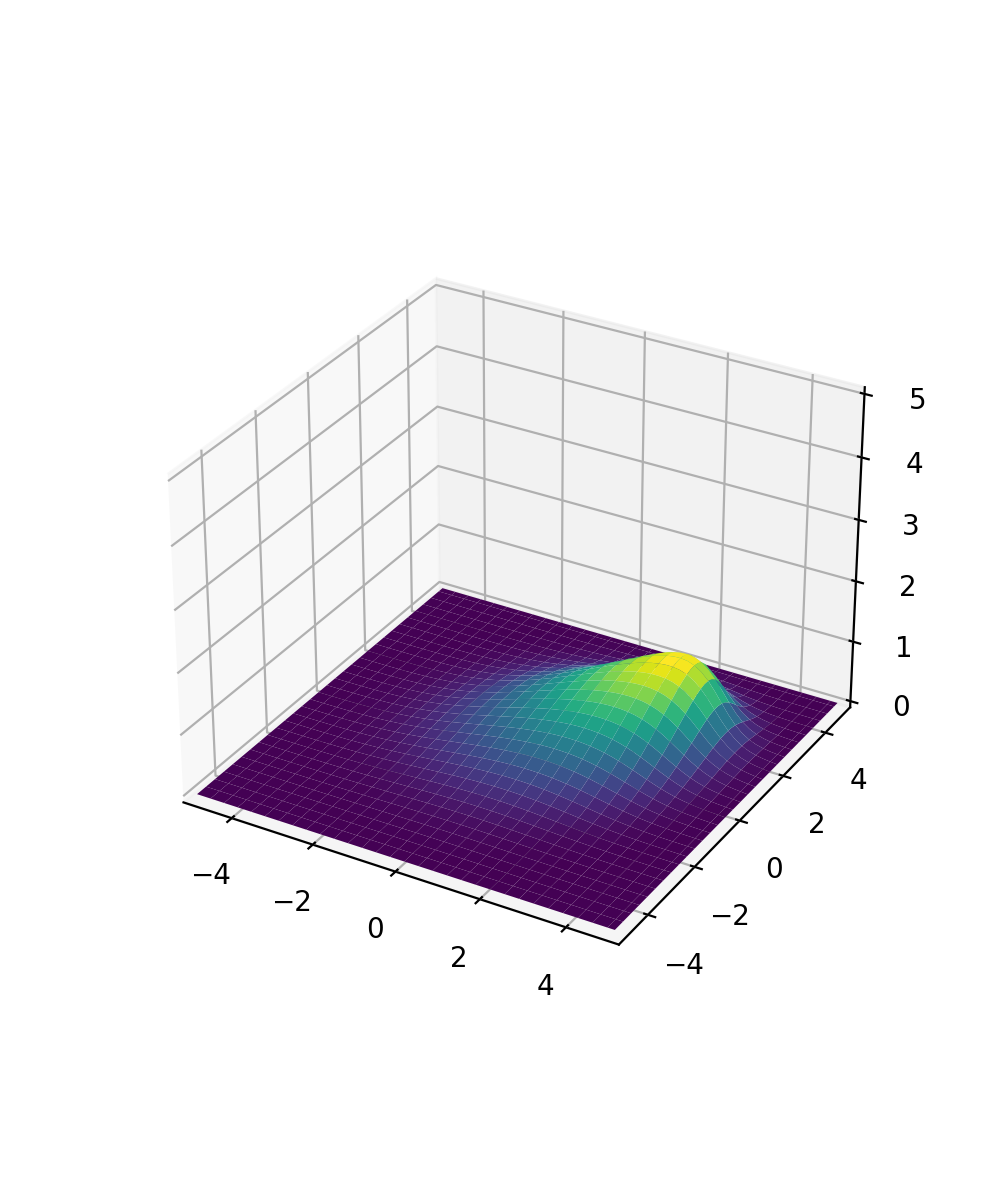

In [180]:

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

x_1,y_1 = np.meshgrid(x,y)

def Update(i):

    ax.clear()
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,10)
    init()
    
    ax.plot_surface(x_1,y_1,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)